# **Analyzing vendors performance (vendors_final_summary table) based on business problem...**

In [1]:
#========= Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine   # create_engine is Used to connect Python to MySQL databases using SQLAlchemy(-SQLAlchemy is a powerful Python library that lets you connect to databases and run SQL queries using both raw SQL and Pythonic ORM-style code.).
from sqlalchemy.engine import URL   # URL is a special helper class in SQLAlchemy used to safely and correctly build database connection strings — especially when your password or other parts contain special characters (like @, :, #, etc.).
import mysql.connector  # Another way : connect to mysql server db to get data & run sql queries
import warnings   # Some old versions of functions work fine but also return warnings -> warnings library is used to deal wit warnings
warnings.filterwarnings('ignore') # Using  warning library to ignore those warnings so that output don't look messy

import scipy.stats as stats  # loads the statistics tools from the scipy library and gives them a short name stats. ( like stats.mean(), stats.ttest_ind(), stats.pearsonr(-,-)-> forcorrelation, stats.chisquare(f_obs=observed, f_exp=expected) -> (χ² test) Does the observed data fit the expected distribution?")

# We also did hypothesis testing later in analysis.  specially to compare means of 2 groups (whether a\they differ or not).
from scipy.stats import ttest_ind  #This line directly imports the ttest_ind function (used to compare the average of two independent groups) so you can use it without writing stats. in front of it.


In [2]:
#======== Connect to mysql database - mysqlconnector + cursor
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='UMMU@112244',
    database='inventory_db'
)


# ============ cursor (DB object to run mysql queries and fetch data line by line from databale tables as per reqd) ===========
cursor = conn.cursor()


In [3]:
#======== Connect to mysql database - using sqlalchemy
url = URL.create(   
        drivername="mysql+mysqlconnector",
        username="root",
        password="UMMU@112244",  # Don't worry, it's safe here
        host="localhost",
        database="Inventory_db"
    )

engine = create_engine(url)  # Connected now 


# Loading Dataset

In [4]:
#============= Loading required dataset - vendors final summary table
with engine.connect() as conn:
    dataset = pd.read_sql_query("SELECT * FROM vendors_final_summary" , conn)

In [5]:
dataset.head() # just to display what we have

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,128606.0,613021.40,4631548.94,236299.10,68601.68,820297.34,17.71,0.89,1.215230
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,142035.0,512403.31,4291107.61,260975.54,144929.24,487066.39,11.35,0.87,1.128039
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,169835.0,420408.49,4131626.15,312057.64,123780.22,713322.47,17.26,0.91,1.208677
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,169057.0,382729.79,3817831.43,310629.46,257032.07,556633.49,14.58,0.84,1.170684
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,121484.0,496084.85,3792631.16,223213.81,257032.07,769425.15,20.29,0.88,1.254506


# Exploratory Data Analysis:
* Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
* In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis.

In [6]:
# === Summary statistics -> alwasy first step to get idea
dataset.describe().T  # tranpose view for better understanding

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.000000,7153.00000,9552.00000,201359.00
Brand,10692.0,18039.228769,12662.187074,58.00,5793.500000,18761.50000,25514.25000,90631.00
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.840000,10.45500,19.48250,5681.81
Volume,10692.0,847.360550,664.309212,50.00,750.000000,750.00000,750.00000,20000.00
ActualPrice,10692.0,35.643671,148.246016,0.49,10.990000,15.99000,28.99000,7499.99
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.000000,262.00000,1975.75000,337660.00
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.457500,3655.46500,20738.24500,3811251.60
TotalSalesQuantity,10692.0,2704.671998,9712.187885,0.00,27.000000,220.00000,1664.25000,301928.00
TotalSalesPrice,10692.0,16586.601980,40132.333435,0.00,223.855000,2437.87500,14100.39750,613021.40
TotalSalesDollars,10692.0,37070.356433,148746.697806,0.00,593.632500,4541.57000,25009.89500,4631548.94


##### Negative & Zero Values:
* Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
* Profit Margin: Has a minimum of 0, which suggests cases where revenue is zero or even lower than costs.
* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

##### Outliers Indicated by High Standard Deviations:
* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
* Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.
---
#### More clearly:
* Need to round() upto 2 places for some columns.
* GrossProfit,ProfitMargin : with -ve entries signify that some products are purchased but sold with low prices (so need promotion or pricing stretegy etc).
* StockTurnover : With 0 or low entries signify No inventory has been sold during the period Or Low inventory sold (indicate no sales or slow business ) :-> reason may be Overstocking, low demand, New inventory just arrived, Pricing or marketing issues etc.
* Simiilarly SalesToPurchaseRatio -> with 0 entries signify some products are not sold after purchase. (i.e., not sold may be becz poor demand, stock stuck, new stock not sold ,  Pricing or marketing issuesetc) so need stretegy.


In [7]:
# ========== While doing feature engineering during summary table extraction, we have done some adjustments already like:  
""" 
====================== 1. Replace inf, -inf with 0 ========================
vendors_final_summary['ProfitMargin'] = vendors_final_summary['ProfitMargin'].replace([np.inf, -np.inf], 0)


====================== 2. round upto 2 decimal places ========================
vendors_final_summary['StockTurnover'] = round(vendors_final_summary['TotalSalesQuantity'] / vendors_final_summary['TotalPurchaseQuantity'], 2)

"""

" \n====================== 1. Replace inf, -inf with 0 ========================\nvendors_final_summary['ProfitMargin'] = vendors_final_summary['ProfitMargin'].replace([np.inf, -np.inf], 0)\n\n\n====================== 2. round upto 2 decimal places ========================\nvendors_final_summary['StockTurnover'] = round(vendors_final_summary['TotalSalesQuantity'] / vendors_final_summary['TotalPurchaseQuantity'], 2)\n\n"

In [8]:
dataset.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'ActualPrice', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollars', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio'],
      dtype='object')

In [9]:
#============= ROund some columns upto 2 decimal places
dataset[['TotalPurchaseDollars', 'TotalSalesDollars', 'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit', 'SalesToPurchaseRatio']] = dataset[['TotalPurchaseDollars', 'TotalSalesDollars', 'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit', 'SalesToPurchaseRatio']].round(2)
dataset.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,128606.0,613021.40,4631548.94,236299.10,68601.68,820297.34,17.71,0.89,1.22
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,142035.0,512403.31,4291107.61,260975.54,144929.24,487066.39,11.35,0.87,1.13
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,169835.0,420408.49,4131626.15,312057.64,123780.22,713322.47,17.26,0.91,1.21
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,169057.0,382729.79,3817831.43,310629.46,257032.07,556633.49,14.58,0.84,1.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,121484.0,496084.85,3792631.16,223213.81,257032.07,769425.15,20.29,0.88,1.25


#### Creates distribution plots (histograms) for all numerical columns in a DataFrame using Seaborn and Matplotlib -> to get idea of distribution (min, max, outliers etc)

In [10]:
numerical_cols = dataset.select_dtypes(include=np.number).columns  #Selects all numerical columns from the DataFrame df


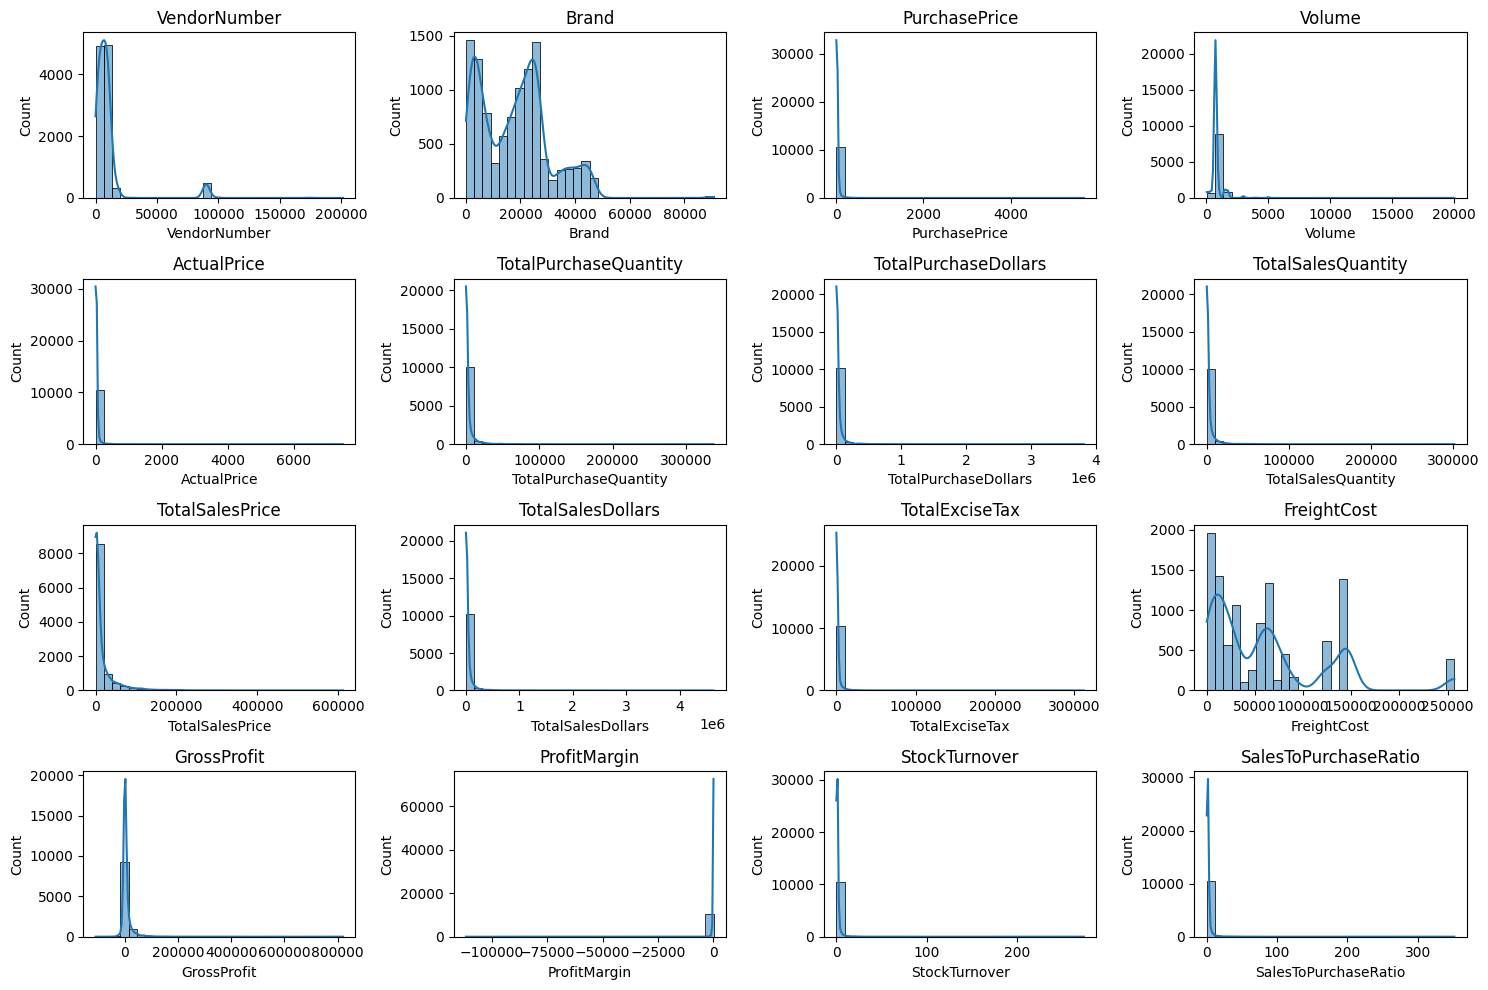

In [11]:
plt.figure(figsize=(15,10)) # Sets the size of the entire figure to 15 inches wide and 10 inches tall.

for indx, colName in enumerate(numerical_cols):   # Loops over each numerical column.    (enumerate(list) -> return index of item, value(col name here) )
    plt.subplot(4,4,indx+1)  # creates a grid of 4x4 subplots (i.e., 16 plots max), and places the current plot at position i+1
    sns.histplot(dataset[colName], kde=True, bins=30)  #Plot the distribution of a column's values using bars (histogram) and a smooth curve (KDE) for better understanding of the data's shape (divide data of current col into 30 bins).
    plt.title(colName)

plt.tight_layout()  # Adjusts the spacing between subplots so titles and plots don’t overlap.
plt.show()  #  Displays all the subplots at once.



#### Check outliers using seaborns box plot

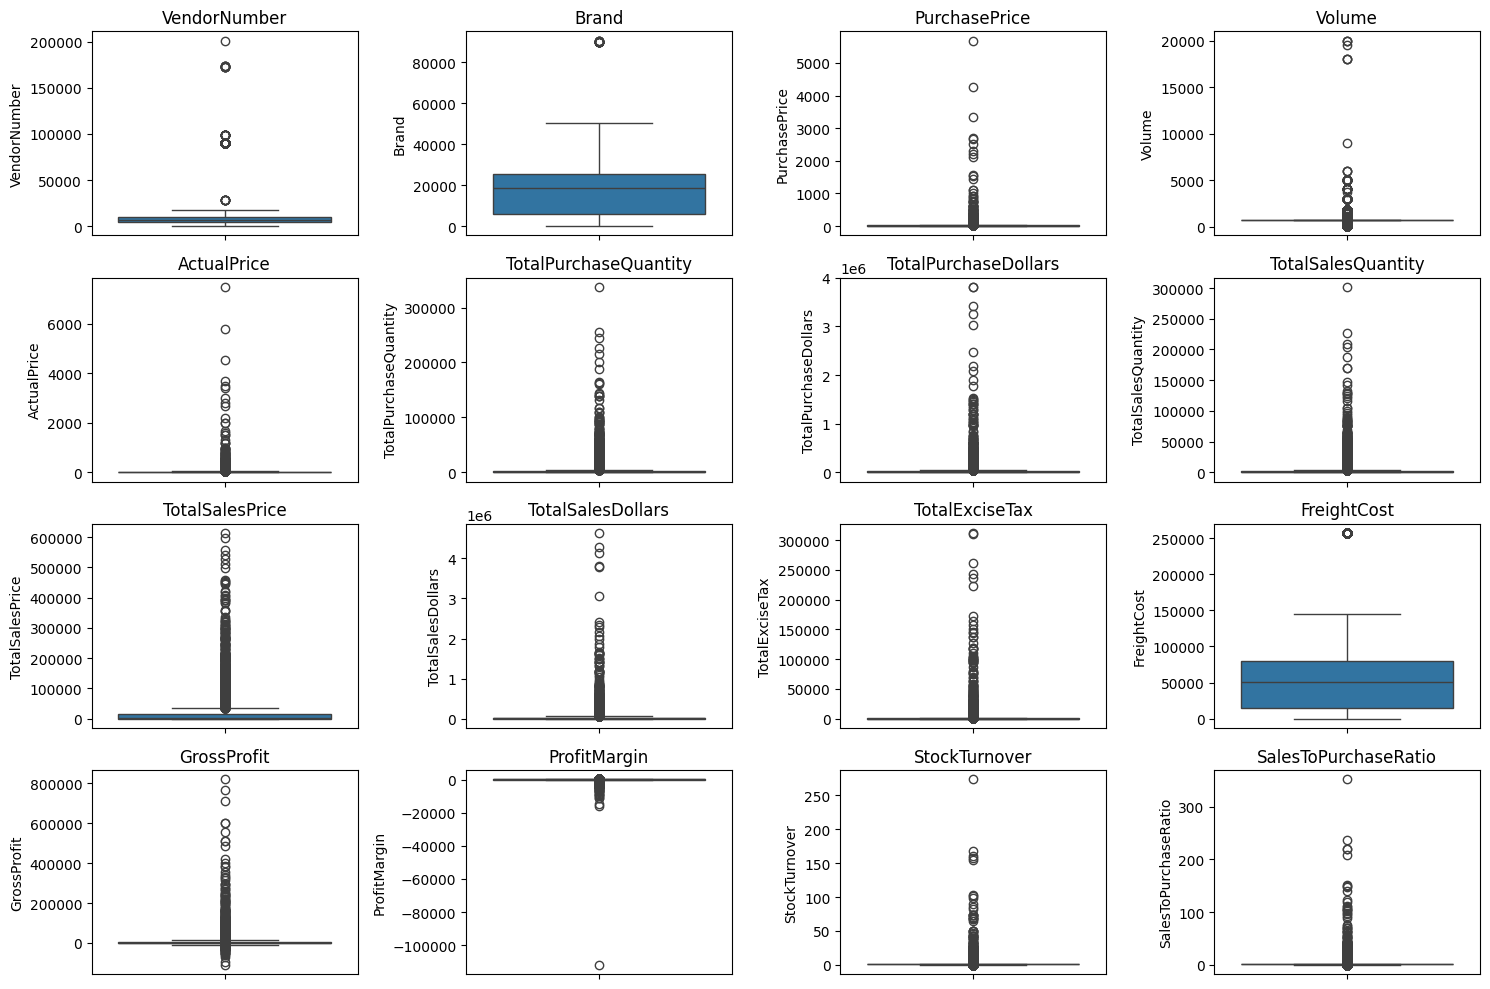

In [12]:
plt.figure(figsize=(15,10)) # Sets the size of the entire figure to 15 inches wide and 10 inches tall.


for indx, colName in enumerate(numerical_cols): 
    plt.subplot(4,4,indx+1)
    sns.boxplot(dataset[colName]) 
    plt.title(colName)

plt.tight_layout() 
plt.show()



#### Some takes:
* PurchasePrice: Likely right-skewed with some very high purchase prices.
* Volume: Likely heavy right-tail (few shipments with very large volumes).
* ActualPrice: Highly right-skewed with extreme high price outliers (points beyond whiskers).
* TotalPurchaseQuantity: Heavy right-tail (bulk-order outliers).
* TotalPurchaseDollars: Pronounced right-skew (few vendors with very high purchase spend).
* TotalSalesQuantity: Heavy right-tail (some products with huge sales).
* SalesPrice: Likely right-skewed with some high sale prices of brands/products.
* TotalSalesDollars: Heavy right-skew (some vendors with very large sales revenues).
* TotalExciseTax: Many zeros (untaxed products/brands) and a few large values.
* FreightCost: Many small (or zero) values with occasional large spikes.
---
* GrossProfit: Potentially includes very large profits or losses.
* ProfitMargin: Outliers beyond 0–100% possible.
* StockTurnover: Likely right-skewed with very high turnover outliers.
* SalesToPurchaseRatio: Some ratios can be extremely large (if purchase is very low and sales high).

## **=================IMPORTANT:**=================**
- We can't remove all columns with outliers like for example we found above "Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential of premium products." here outliers may be becaus eof PREMIUM PRODUCTS or other case we don't know. So we have to take into account these columns.

  ---


### **Filter Required Data**
We filter data from dataset(vendors_final_summary) to consider only those vendors who have sold something and thus remove inconsistencies like vendors with GrossProfit <=0, ProfitMargin <=0, TotalSalesQuantity <=0 etc

In [13]:
with engine.connect() as conn:
    reqd_dataset = pd.read_sql_query(""" SELECT * FROM vendors_final_summary
                WHERE TotalSalesQuantity > 0
                AND GrossProfit > 0 """ , conn) 
    # TotalSalesQuantity > 0 : means vendors should have sold something atleast.
    # GrossProfit > 0  : Vendors should not be in loss (Our business problem invli=ve finding underperforming brands/products but not thos who are totally not contributing anything positive.
    
reqd_dataset.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,128606.0,613021.40,4631548.94,236299.10,68601.68,820297.34,17.71,0.89,1.215230
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,142035.0,512403.31,4291107.61,260975.54,144929.24,487066.39,11.35,0.87,1.128039
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,169835.0,420408.49,4131626.15,312057.64,123780.22,713322.47,17.26,0.91,1.208677
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,169057.0,382729.79,3817831.43,310629.46,257032.07,556633.49,14.58,0.84,1.170684
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,121484.0,496084.85,3792631.16,223213.81,257032.07,769425.15,20.29,0.88,1.254506


In [14]:
#Count number of rows before and after
print("Entries with all records(effective and ineffective) :", dataset.shape[0]) # reqd_dataset.shape :  give shape as (totalrows, totalcols)
print("Entries after removing inconsistencies:", reqd_dataset.shape[0]) # reqd_dataset.shape :  give shape as (totalrows, totalcols)

Entries with all records(effective and ineffective) : 10692
Entries after removing inconsistencies: 7811


### After cleaning let's again plot distribution...

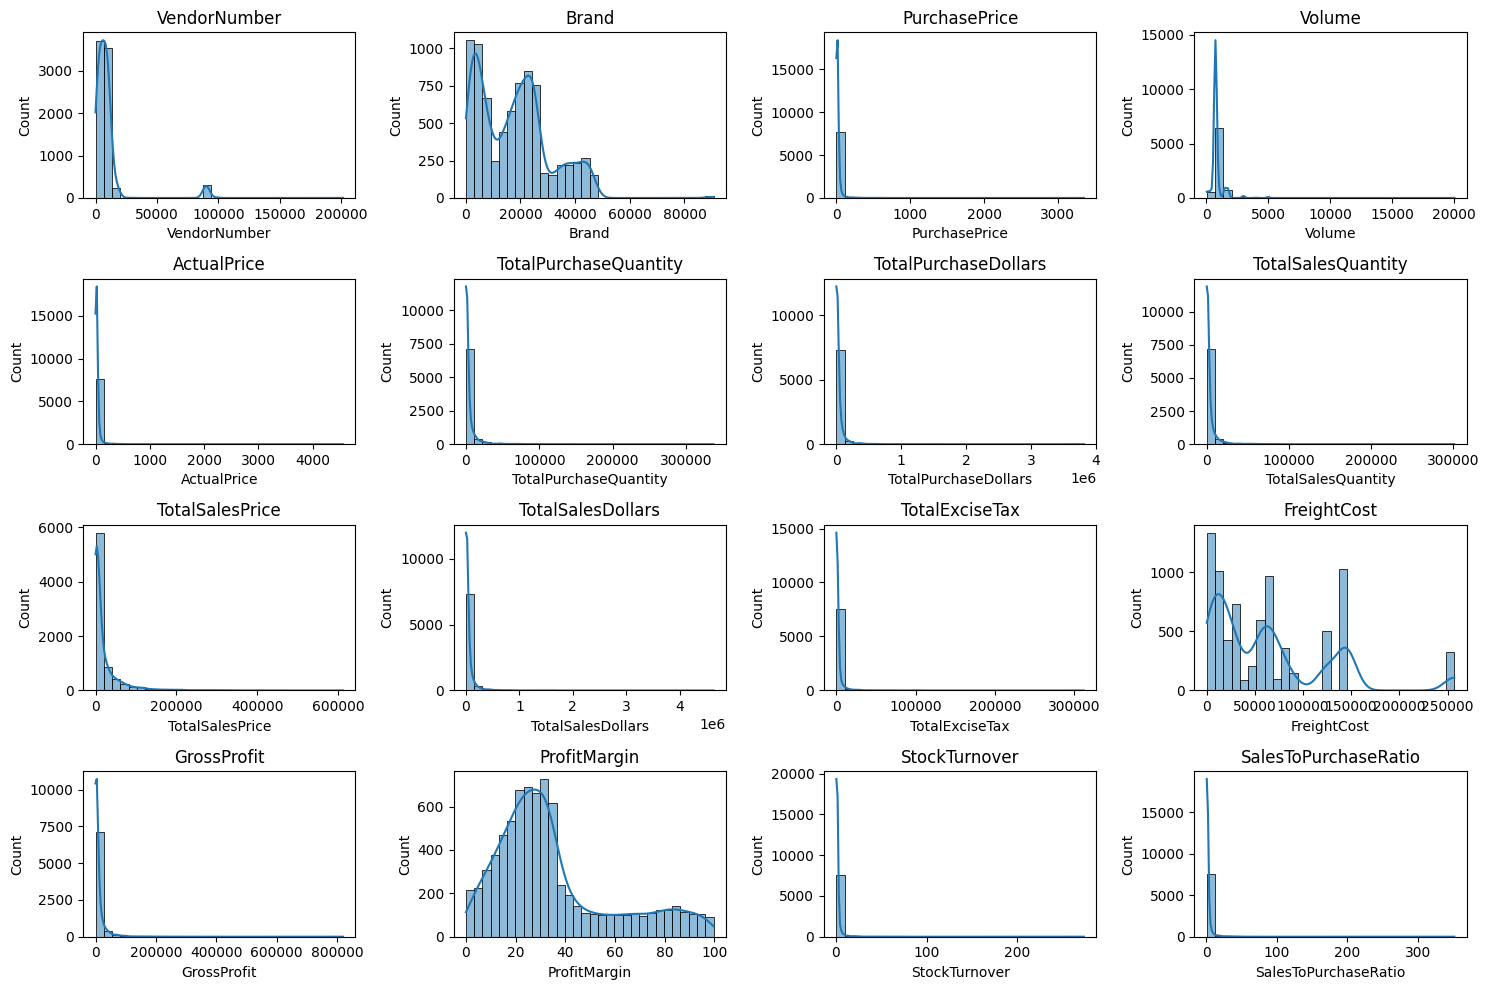

In [15]:
# Numerical columns remain same.

plt.figure(figsize=(15,10)) # Sets the size of the entire figure to 15 inches wide and 10 inches tall.


for indx, colName in enumerate(numerical_cols): 
    plt.subplot(4,4,indx+1)
    sns.histplot(reqd_dataset[colName], kde = True, bins= 30) 
    plt.title(colName)

plt.tight_layout() 
plt.show()


#### Key takes **:-**
* Clearly see we have ProfitMargin in range 0-100 (Exluding all such brands-vendors with negative ProfitMargin).

### ======== Vendors and Products that appear most frequently (let's see top 10)  ========

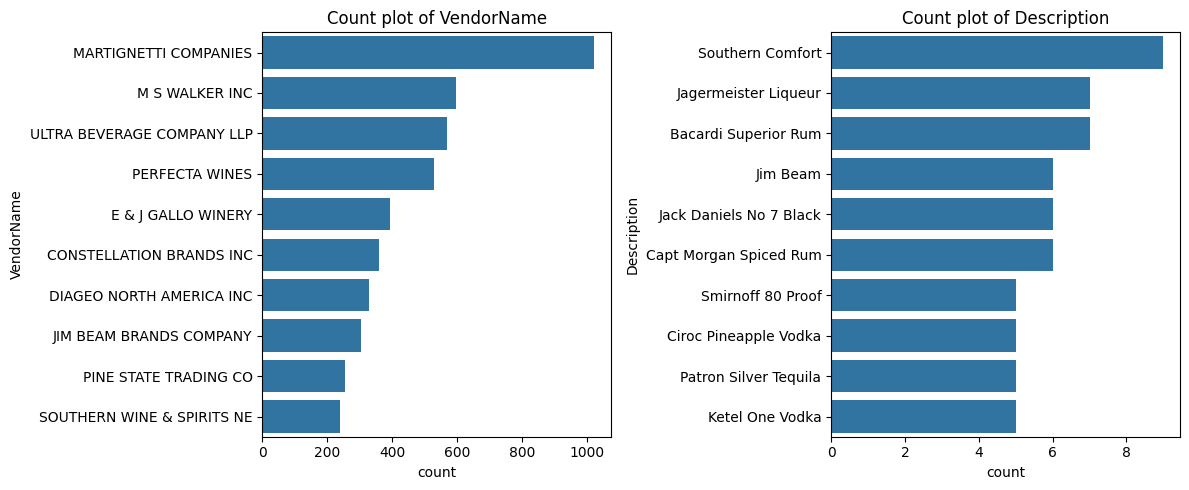

In [16]:
categorical_cols = ["VendorName", "Description"]  # Description -> represent Product description (Brand is like barcode for each product and some Products have same Brand).

plt.figure(figsize=(12,5)) # 12 inch wide, 5inch heighyt
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=reqd_dataset[col], order = reqd_dataset[col].value_counts().index[ :10]) # reqd_dataset[col].count_values() :- counts how many times each unique value appears in the current "col".
    # reqd_dataset[col].value_counts().index :- Returns all unique category names (sorted by their frequency)....... reqd_dataset[col].value_counts().index :- Returns only the top 10 most frequent 'col'.
    plt.title(f"Count plot of {col}")

plt.tight_layout()
plt.show()

# ===== Let's see correlation between columns (Numerical) using .corr() & heatmap() =====

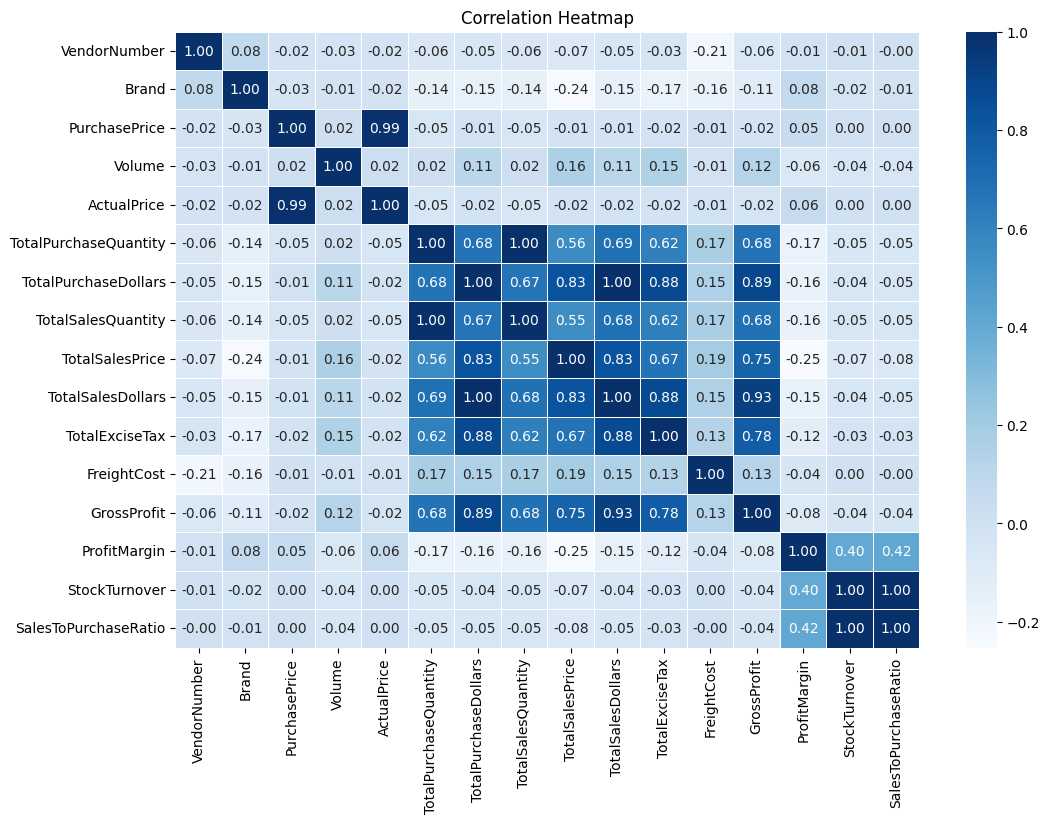

In [17]:
# We have numerical cols 
# numerical_cols = dataset.select_dtypes(include=np.number).columns

plt.figure(figsize=(12,8))
correlation_matrix = reqd_dataset[numerical_cols].corr()   # COrrelation between numerical cols in tabular form (rows , cols as numerical_cols)
# Show it using heatmap()
sns.heatmap(correlation_matrix, annot=True, fmt="0.2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
          

### Key Takes:
* PurchasePrice has WEAK neg CORR with TotalSalesDollars(-0.01) AND GrossProfit(-0.02) , suggesting that variations in  PurchasePrice does not significantly impact Sales Revenue Or Profit.
* STRONG CORR between Total Purchase Quantity and Total Sales Quantity, confirming efficient inventory turnover (Good stock management i.e, no over/under buying OR what we buy sells with same demand).
* WEAK(neg) CORR between ProfitMargin and TotalSalesPrice (-0.25), suggesting that as sales price increase, profit margins decreases (less profit) -> May be bcz of competetive pricing pressure.
* StockTurnover and SalesToPurchaseRatio are perfectly correlated (r = 1.00) i.e., as StockTurnover increare the SalesToPurchaseRatio increase(more sales).
* - StockTurnover vs ProfitMargin → SLight pos corr 0.40 : as stock turnover increases (stock sold faster), profit margin tends to improve.
* - StockTurnover vs GrossProfit → SLight neg corr -0.04 :stock turnover does not really impact gross profit (like may be low per unit price, High COGS etc) significantly (Even if items sell fast, it doesn’t guarantee high total profit, especially if prices or margins are low.)
  - REMARK (GrossProfit VS ProfitMargin):
    1. Gross Profit is an absolute value
        It just tells you how much money you're making overall.
        It's heavily influenced by sales volume, cost of goods, and price per unit.
    2. Profit Margin is a ratio
        It shows how efficiently you’re converting sales into profit.
        It's independent of how many units you sell — it reflects profitability per unit of sale.



---
# **Data Analysis**
* FInally Solving reaserch questions that leads us to approach our business problem
---

#### 1. =========== Identify Brands(Products) that need promotional or pricing adjustments i.e, those that exhibit(showed) lower sales performance but higher profit margins. (So that more sales of such brands can lead even more profit). ==============

In [18]:
# Finding those products
brand_performance = reqd_dataset.groupby("Description").agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin' : 'mean'}).reset_index()

In [19]:
#=== Setting threshhold to categorise lower and higher sales performance brands(products).
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)  # 15th percentile value (Give me the value below which 15% of brands have low total sales e.g if you haave 100 brands it gives 15th lowest sales brand)
#=== Setting threshhold to categorise lower and higher ProfitMargin brands(products).
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)  #Using numpy -> np.percentile(brand_performance['ProfitMargin'], 85) :- 85th percentile value (value below which 85% of brands have lower ProfitMargin)

In [20]:
print(low_sales_threshold, high_margin_threshold)

593.784 66.54


In [21]:
#======== Now filter them (low sales and high profit margin) -> need Promotional or pricing adjustments
target_brands = brand_performance[ (brand_performance['TotalSalesDollars']  <= low_sales_threshold )
                                    & (brand_performance['ProfitMargin']  >= high_margin_threshold )
]
print("Brands with low sales but high Profit margins:")
display(target_brands.sort_values('TotalSalesDollars', ascending=True))

Brands with low sales but high Profit margins:


,Description,TotalSalesDollars,ProfitMargin
1922,Concannon Glen Ellen Wh Zin,15.95,83.45
2029,Crown Royal Apple,27.86,89.81
5722,Sauza Sprklg Wild Berry Marg,27.96,82.15
4433,Merry Irish Cream Liqueur,35.97,73.53
6584,Tracia Syrah,44.94,88.50
...,...,...,...
3215,Harthill Farms Cab Svgn,560.92,89.35
2534,Ermita Sn Felices Rose Rioja,586.63,90.11
2073,Cupcake Chianti,587.16,92.22
6419,The Irishman Irish Whiskey,587.25,72.09


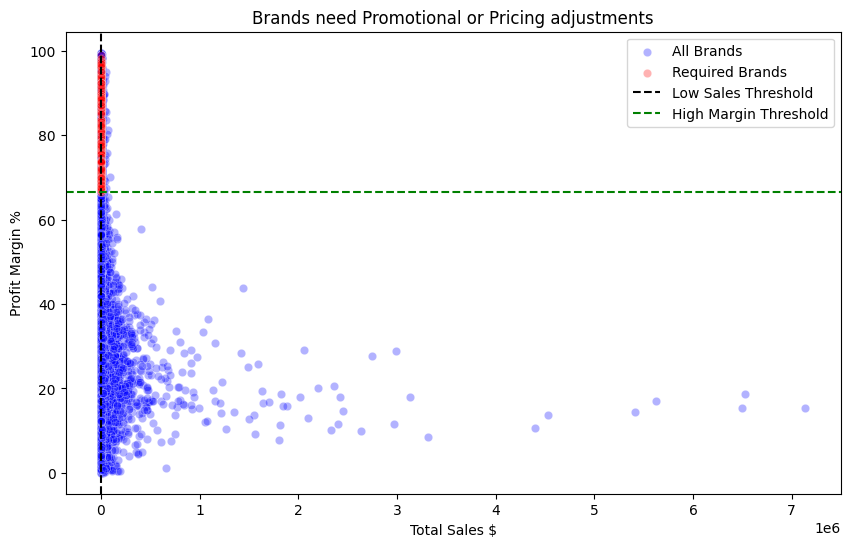

In [22]:
#========== Let's show it using Scatter diagram
plt.figure(figsize=(10,6))

sns.scatterplot(data = brand_performance, x = "TotalSalesDollars", y= "ProfitMargin", color="blue", label="All Brands", alpha= 0.3)
sns.scatterplot(data = target_brands, x = "TotalSalesDollars", y= "ProfitMargin", color="red", label="Required Brands", alpha= 0.3)
plt.xlabel("Total Sales $")
plt.ylabel("Profit Margin %")
plt.title("Brands need Promotional or Pricing adjustments")
# Let's show Threshhold lines as well for an amazing visualization
plt.axvline(low_sales_threshold, linestyle="--", color="black", label="Low Sales Threshold") # TotalSalesDollars are shown on X axis so need threshhold on vertical axis to cut it
plt.axhline(high_margin_threshold,  linestyle="--", color="green", label="High Margin Threshold") # ProfitMargin is shown on Y axis so need threshhold on horizontal axis to cut it
plt.legend() # To display labels set above
plt.show()

In [23]:
#======== for better visualization (ignoring outliers)  -> Actual visualization will be done while we create dashboard
temp_brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 1500 ] # Just for better visualization (Actual is above)

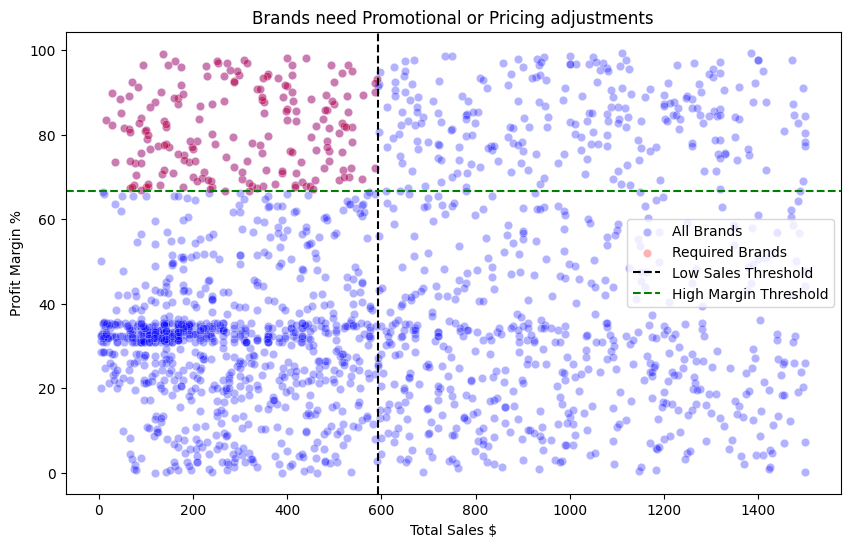

In [24]:
plt.figure(figsize=(10,6))

sns.scatterplot(data = temp_brand_performance, x = "TotalSalesDollars", y= "ProfitMargin", color="blue", label="All Brands", alpha= 0.3)
sns.scatterplot(data = target_brands, x = "TotalSalesDollars", y= "ProfitMargin", color="red", label="Required Brands", alpha= 0.3)
plt.xlabel("Total Sales $")
plt.ylabel("Profit Margin %")
plt.title("Brands need Promotional or Pricing adjustments")
# Let's show Threshhold lines as well for an amazing visualization
plt.axvline(low_sales_threshold, linestyle="--", color="black", label="Low Sales Threshold") # TotalSalesDollars are shown on X axis so need threshhold on vertical axis to cut it
plt.axhline(high_margin_threshold,  linestyle="--", color="green", label="High Margin Threshold") # ProfitMargin is shown on Y axis so need threshhold on horizontal axis to cut it
plt.legend() # To display labels set above
plt.show()

#### **===========2. Vendors and Brands demonstrating highest Sales Performance ===========**

In [25]:
top_vendors = reqd_dataset.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)   # top 10
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      5.745646e+07
MARTIGNETTI COMPANIES         3.417359e+07
JIM BEAM BRANDS COMPANY       2.721401e+07
PERNOD RICARD USA             2.651618e+07
BACARDI USA INC               2.213937e+07
CONSTELLATION BRANDS INC      2.128650e+07
E & J GALLO WINERY            1.594314e+07
BROWN-FORMAN CORP             1.569337e+07
ULTRA BEVERAGE COMPANY LLP    1.409072e+07
M S WALKER INC                1.276798e+07
Name: TotalSalesDollars, dtype: float64

In [26]:
top_brands = reqd_dataset.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_brands

Description
Jack Daniels No 7 Black    7139389.04
Tito's Handmade Vodka      6523412.80
Grey Goose Vodka           6494860.50
Absolut 80 Proof           5626266.20
Capt Morgan Spiced Rum     5414588.67
Ketel One Vodka            4532794.65
Jameson Irish Whiskey      4396693.55
Baileys Irish Cream        3310355.26
Tanqueray                  3129865.21
Jim Beam                   2994630.99
Name: TotalSalesDollars, dtype: float64

In [27]:
# Changing format of sales(which is in dollars) to  Millions, Thousands(k)
def format_dollars(sales):
    if sales >= 1000000:  # 10 lakh = 1M
        return f"{sales/1000000:.2f}M"
    elif sales >= 1000: # 1000 = 1K
        return f"{sales/1000:.2f}K"
    else:
        return str(sales)   # normal dollar form like 100$ = 100 simply

In [28]:
#========== Changing format using lambda function(inside lambda we call above func)
top_vendors.apply(lambda x : format_dollars(x))


VendorName
DIAGEO NORTH AMERICA INC      57.46M
MARTIGNETTI COMPANIES         34.17M
JIM BEAM BRANDS COMPANY       27.21M
PERNOD RICARD USA             26.52M
BACARDI USA INC               22.14M
CONSTELLATION BRANDS INC      21.29M
E & J GALLO WINERY            15.94M
BROWN-FORMAN CORP             15.69M
ULTRA BEVERAGE COMPANY LLP    14.09M
M S WALKER INC                12.77M
Name: TotalSalesDollars, dtype: object

In [29]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.14M
Tito's Handmade Vodka      6.52M
Grey Goose Vodka           6.49M
Absolut 80 Proof           5.63M
Capt Morgan Spiced Rum     5.41M
Ketel One Vodka            4.53M
Jameson Irish Whiskey      4.40M
Baileys Irish Cream        3.31M
Tanqueray                  3.13M
Jim Beam                   2.99M
Name: TotalSalesDollars, dtype: object

In [30]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      5.745646e+07
MARTIGNETTI COMPANIES         3.417359e+07
JIM BEAM BRANDS COMPANY       2.721401e+07
PERNOD RICARD USA             2.651618e+07
BACARDI USA INC               2.213937e+07
CONSTELLATION BRANDS INC      2.128650e+07
E & J GALLO WINERY            1.594314e+07
BROWN-FORMAN CORP             1.569337e+07
ULTRA BEVERAGE COMPANY LLP    1.409072e+07
M S WALKER INC                1.276798e+07
Name: TotalSalesDollars, dtype: float64

In [31]:
top_brands.values

array([7139389.04000016, 6523412.80000005, 6494860.50000015,
       5626266.20000012, 5414588.67000029, 4532794.6500003 ,
       4396693.54999959, 3310355.25999965, 3129865.20999995,
       2994630.98999969])

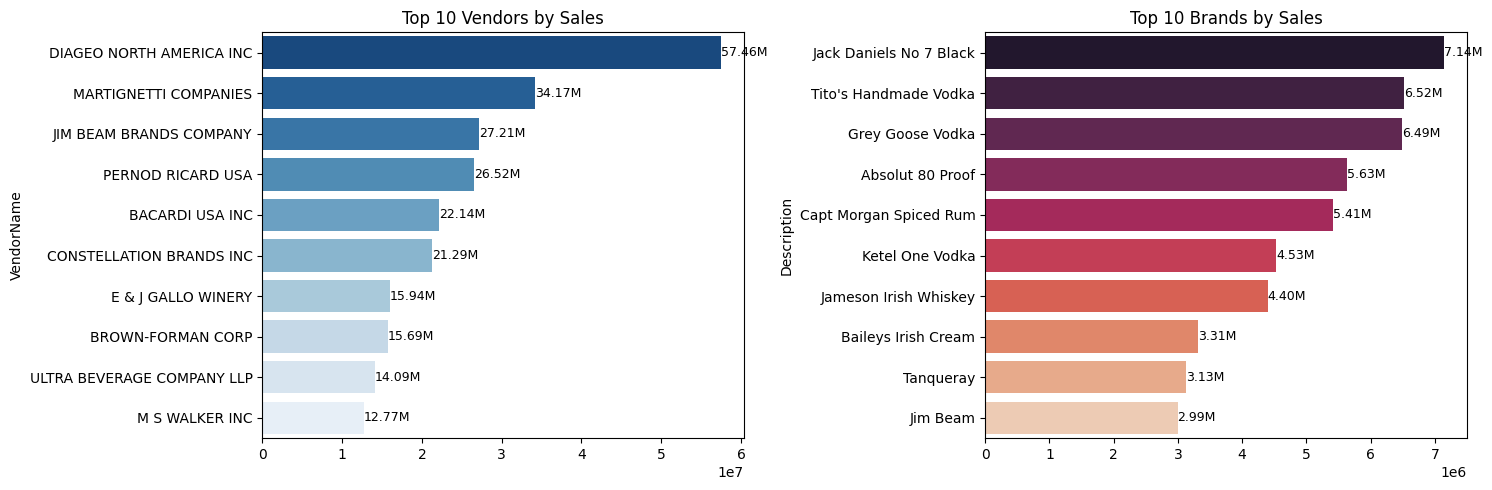

In [32]:
#=================== PLot top_vendors & top_brands
plt.figure(figsize=(15,5))

#============ top_vendors
plt.subplot(1,2,1)   # in a grid of 1 row, 2 cols , put this plot at position 1
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")  # store as ax1 (obj returned by barplot() 
plt.title("Top 10 Vendors by Sales")

# For data labels
for i, value in enumerate(top_vendors.values):  # i : index(position), value: actual sales 
    plt.text(value, i, format_dollars(value), va='center', ha='left', fontsize=9)  # va='center', ha='left' : to align at center
    """ |> plt.text(x, y, s, **kwargs)
#        Parameters:
#        x: The x-coordinate for the position where the text will appear on the plot. (here we have horizontal bar, so x as y)
#        y: The y-coordinate for the position where the text will appear on the plot.
#        s: The string of text you want to display. This can be a label, number, or any other text.
#        **kwargs: Additional optional arguments to customize the text, such as color, size, alignment, and more """


#============ top_brands
plt.subplot(1,2,2)   
ax1 = sns.barplot(y=top_brands.index, x=top_brands.values, palette="rocket")   # y as index, x as values -> Horizontal bar graph
plt.title("Top 10 Brands by Sales")

# For data labels
for i, value in enumerate(top_brands.values):  # i : index(position), value: actual sales 
    plt.text(value, i, format_dollars(value), va='center', ha='left', fontsize=9)  # format_dollars(value) -> Function defined above to change long dollar values into formats like ,illions, thousands etc 


plt.tight_layout()
plt.show()

#### **========3. Vendors contributing the most to total purchase dollars (Who purchase more) ========**

In [44]:
vendor_performance = reqd_dataset.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit":"sum",
    "TotalSalesDollars":"sum"}).reset_index()
print(vendor_performance.shape)
display(vendor_performance)

(116, 4)


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,3.54,449.70
1,ALISA CARR BEVERAGES,25698.12,70722.68,96420.80
2,ALTAMAR BRANDS LLC,11427.20,2170.08,13597.28
3,AMERICAN SPIRITS EXCHANGE,934.08,379.19,1313.27
4,AMERICAN VINTAGE BEVERAGE,104435.68,19709.75,124145.43
...,...,...,...,...
111,WEIN BAUER INC,42694.64,5654.71,48349.35
112,WESTERN SPIRITS BEVERAGE CO,272579.98,66639.95,339219.93
113,WILLIAM GRANT & SONS INC,4407111.10,695939.64,5103050.74
114,WINE GROUP INC,5146662.78,2274189.75,7420852.53


#### Key take: Total of 116 Vendors

In [45]:
#====== New Column -> Contribution of Vendors towards overall/total Purchase.
vendor_performance["PurchaseContribution%"] = ( vendor_performance["TotalPurchaseDollars"] / vendor_performance["TotalPurchaseDollars"].sum() ) * 100        # Purchase of vendor / Total Purchase) * 100  
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,3.54,449.70,0.000151
1,ALISA CARR BEVERAGES,25698.12,70722.68,96420.80,0.008725
2,ALTAMAR BRANDS LLC,11427.20,2170.08,13597.28,0.003880
3,AMERICAN SPIRITS EXCHANGE,934.08,379.19,1313.27,0.000317
4,AMERICAN VINTAGE BEVERAGE,104435.68,19709.75,124145.43,0.035460
...,...,...,...,...,...
111,WEIN BAUER INC,42694.64,5654.71,48349.35,0.014496
112,WESTERN SPIRITS BEVERAGE CO,272579.98,66639.95,339219.93,0.092551
113,WILLIAM GRANT & SONS INC,4407111.10,695939.64,5103050.74,1.496382
114,WINE GROUP INC,5146662.78,2274189.75,7420852.53,1.747488


In [46]:
#=============== We need top 10 Vendors contributing the most to overall Purchase Dollars.
top_purchase_vendors = round(vendor_performance.sort_values("PurchaseContribution%", ascending = False), 2) # Decending order of PurcaseContribution    
top_purchase_vendors  = top_purchase_vendors.head(10)   # Top 10

#=============== Adjusting format like in Millions, Thousands etc by calling above created function "format_dollars()"
top_purchase_vendors["TotalPurchaseDollars"] = top_purchase_vendors["TotalPurchaseDollars"].apply(format_dollars)
top_purchase_vendors["GrossProfit"] = top_purchase_vendors["GrossProfit"].apply(format_dollars)
top_purchase_vendors["TotalSalesDollars"] = top_purchase_vendors["TotalSalesDollars"].apply(format_dollars)

#=== now see top 10 contributors of Purchasing.
top_purchase_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,47.75M,9.70M,57.46M,16.21
57,MARTIGNETTI COMPANIES,24.94M,9.23M,34.17M,8.47
46,JIM BEAM BRANDS COMPANY,22.69M,4.53M,27.21M,7.70
68,PERNOD RICARD USA,22.44M,4.07M,26.52M,7.62
6,BACARDI USA INC,17.30M,4.84M,22.14M,5.87
20,CONSTELLATION BRANDS INC,14.98M,6.31M,21.29M,5.09
11,BROWN-FORMAN CORP,12.78M,2.91M,15.69M,4.34
30,E & J GALLO WINERY,11.76M,4.19M,15.94M,3.99
105,ULTRA BEVERAGE COMPANY LLP,10.48M,3.61M,14.09M,3.56
53,M S WALKER INC,9.45M,3.32M,12.77M,3.21


In [47]:
# ======= Total contribution of top 10 vendors
top_purchase_vendors["PurchaseContribution%"].sum()

np.float64(66.06)

#### ====== Key Takes:
* Top 10 Vendors contribute 66% to overall PurchaseDollars.
* Remaining 106 (116-10) vendors contribute 36% only.

In [48]:
#=========== Adding commulative COntribution so that we can show them on graph
top_purchase_vendors["Cummulative_Contribution%"] = top_purchase_vendors["PurchaseContribution%"].cumsum()
top_purchase_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cummulative_Contribution%
25,DIAGEO NORTH AMERICA INC,47.75M,9.70M,57.46M,16.21,16.21
57,MARTIGNETTI COMPANIES,24.94M,9.23M,34.17M,8.47,24.68
46,JIM BEAM BRANDS COMPANY,22.69M,4.53M,27.21M,7.70,32.38
68,PERNOD RICARD USA,22.44M,4.07M,26.52M,7.62,40.00
6,BACARDI USA INC,17.30M,4.84M,22.14M,5.87,45.87
20,CONSTELLATION BRANDS INC,14.98M,6.31M,21.29M,5.09,50.96
11,BROWN-FORMAN CORP,12.78M,2.91M,15.69M,4.34,55.30
30,E & J GALLO WINERY,11.76M,4.19M,15.94M,3.99,59.29
105,ULTRA BEVERAGE COMPANY LLP,10.48M,3.61M,14.09M,3.56,62.85
53,M S WALKER INC,9.45M,3.32M,12.77M,3.21,66.06


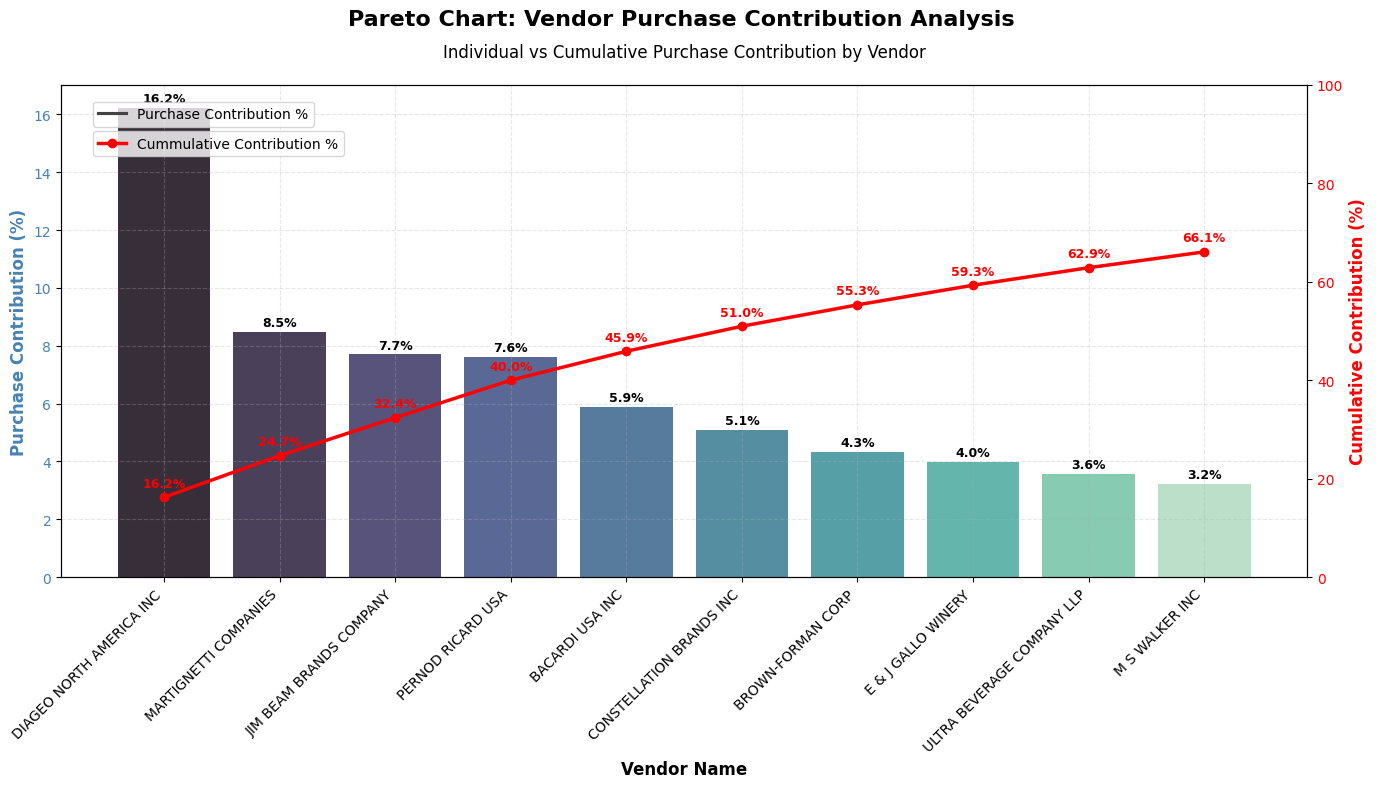

In [74]:
#=============== Let's visualize this  (I asked "Claude.ai" for this pereto chart(Bar + line plot) by providing above table and good promt, Here is what I got)
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(14, 8))  # -> a Figure object (fig) → the overall canvas ,   an Axes object (ax1) → the actual area where the plot is drawn
                 #   figsize=(14, 8) sets the size of the canvas in inche
# Create the bar plot for Purchase Contribution%
bars = sns.barplot(data=top_purchase_vendors, x='VendorName', y='PurchaseContribution%', ax=ax1, 
                   palette='mako', alpha=0.9)

# Customize primary y-axis (bars)
ax1.set_xlabel('Vendor Name', fontsize=12, fontweight='bold')
ax1.set_ylabel('Purchase Contribution (%)', fontsize=12, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Rotate x-axis labels for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Create secondary y-axis for cumulative line
ax2 = ax1.twinx()

# Create the line plot for Cumulative Contribution%
line = ax2.plot(range(len(top_purchase_vendors)), top_purchase_vendors['Cummulative_Contribution%'], 
                color='red', marker='o', linewidth=2.5, markersize=6, 
                label='Cumulative Contribution %')

# Customize secondary y-axis (line)
ax2.set_ylabel('Cumulative Contribution (%)', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, 100)

# Add grid for better readability
ax1.grid(True, alpha=0.3, linestyle='--')

# Add value labels on bars
for i, bar in enumerate(bars.patches):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Add value labels on line points
for i, value in enumerate(top_purchase_vendors['Cummulative_Contribution%']):
    ax2.text(i, value + 1.5, f'{value:.1f}%', ha='center', va='bottom', 
             fontsize=9, fontweight='bold', color='red')

# Add title and subtitle
plt.suptitle('Pareto Chart: Vendor Purchase Contribution Analysis', 
             fontsize=16, fontweight='bold', y=0.98)
ax1.set_title('Individual vs Cumulative Purchase Contribution by Vendor', 
              fontsize=12, pad=20)

# Add legends
ax1.legend(['Purchase Contribution %'], loc='upper left', bbox_to_anchor=(0.02, 0.98))
ax2.legend(['Cummulative Contribution %'], loc='upper left', bbox_to_anchor=(0.02, 0.92))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Add a subtle background color
fig.patch.set_facecolor('white')

# Show the plot
plt.show()

#### **========4. Total Procurement dependent on top vendors ( A company buys most of its goods or materials from a few top vendors. i.e., company is relying heavily on a few Vendors to provide what it needs to run the business).========**

In [77]:
#============ Top 10 vendors contributed most on purchase (calculated above)
print(f"Total purchase contribution of top 10 vendors: {round(top_purchase_vendors['PurchaseContribution%'].sum(),2)}%")
#======== Dependency on top 10 vendors (remaining 106 vendors contriobute collectively 36%)

Total purchase contribution of top 10 vendors: 66.06%


In [101]:
#========= Let's show it graphically using pie chart
vendors = list(top_purchase_vendors['VendorName'].values)
purchasecontribution = list(top_purchase_vendors['PurchaseContribution%'].values)

#==== finding contribution of rest (106) vendors
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution
#=== adding it to above lists
vendors.append("Other Vendors")   # new element to list vendors
purchasecontribution.append(remaining_contribution)   # their corresponding contribution to purchase




In [102]:
purchasecontribution

[np.float64(16.21),
 np.float64(8.47),
 np.float64(7.7),
 np.float64(7.62),
 np.float64(5.87),
 np.float64(5.09),
 np.float64(4.34),
 np.float64(3.99),
 np.float64(3.56),
 np.float64(3.21),
 np.float64(33.94)]

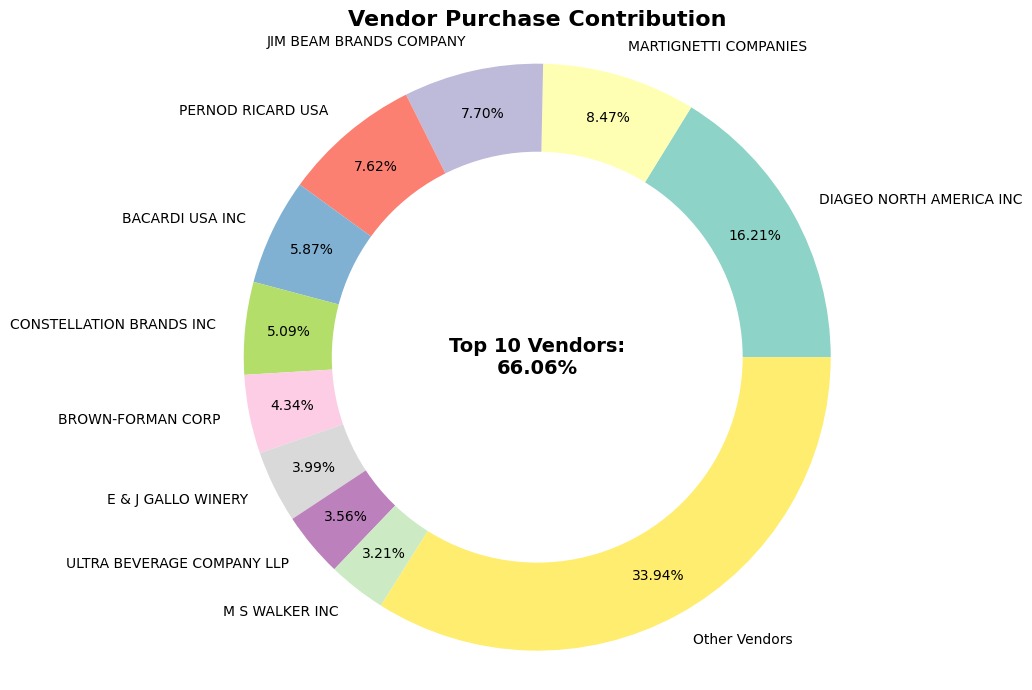

In [118]:

# Create donut chart
fig, ax = plt.subplots(figsize=(10, 7))

# Builtin colosrs
clr = plt.cm.Set3(np.linspace(0, 1, len(purchasecontribution)))
# Create pie chart with hole in middle (donut)
wedges, texts, autotexts = ax.pie(purchasecontribution, 
                                  labels=vendors,
                                  autopct='%1.2f%%',
                                  pctdistance=0.85,
                                  colors = clr,
                                  wedgeprops=dict(width=0.5))

# Add center circle for donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

#========= Add top 10 vendors contribution at the center
plt.text(0,0, f"Top 10 Vendors:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha= 'center', va='center')


# Title
plt.title('Vendor Purchase Contribution', fontsize=16, fontweight='bold')

# Make it circular and show
ax.axis('equal')
plt.tight_layout()
plt.show()

#### **========5.Does purchasing in bulk reduce the unit price? If yes, what is the optimal purchase volume for cost savings?"========**

In [120]:
reqd_dataset.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'Volume', 'ActualPrice', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollars', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalesToPurchaseRatio'],
      dtype='object')

In [121]:
#========= price of single quantity (unit purchase price)  -> add as a new column in our dataset
reqd_dataset["UnitPurchasePrice"] = reqd_dataset["TotalPurchaseDollars"] / reqd_dataset["TotalPurchaseQuantity"]   # It is actually same as 'Purchase price, but still for understanding
reqd_dataset

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,128606.0,613021.40,4631548.94,236299.10,68601.68,820297.34,17.71,0.89,1.215230,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,142035.0,512403.31,4291107.61,260975.54,144929.24,487066.39,11.35,0.87,1.128039,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,169835.0,420408.49,4131626.15,312057.64,123780.22,713322.47,17.26,0.91,1.208677,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,169057.0,382729.79,3817831.43,310629.46,257032.07,556633.49,14.58,0.84,1.170684,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,121484.0,496084.85,3792631.16,223213.81,257032.07,769425.15,20.29,0.88,1.254506,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,50.0,1.99,2.0,2.84,14.0,5.97,27.86,0.73,257032.07,25.02,89.81,7.00,9.809859,1.42
7807,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2.0,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.45,2.50,6.041667,1.32
7808,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6.0,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.44,22.33,28.059829,0.39
7809,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1.0,1.47,69.0,71.64,137.31,14.49,257032.07,135.84,98.93,69.00,93.408163,1.47


In [126]:
#======== Dividing Purchase Quantity into 3 buckets -> small, medium, large  -> Add as new column
reqd_dataset["OrderSize"] = pd.qcut(reqd_dataset["TotalPurchaseQuantity"], q=3,  labels=["Small", "Medium", "Large"] )
""" pd.qcut(data, No_of_bins, labels=None):
pd.qcut() is used to split a column into equal-sized quantile bins (like quartiles, percentiles, etc.). It's useful when you want to divide data into parts that each contain the same number of observations.
"""
display(reqd_dataset)


,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,128606.0,613021.40,4631548.94,236299.10,68601.68,820297.34,17.71,0.89,1.215230,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,142035.0,512403.31,4291107.61,260975.54,144929.24,487066.39,11.35,0.87,1.128039,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,169835.0,420408.49,4131626.15,312057.64,123780.22,713322.47,17.26,0.91,1.208677,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,169057.0,382729.79,3817831.43,310629.46,257032.07,556633.49,14.58,0.84,1.170684,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,121484.0,496084.85,3792631.16,223213.81,257032.07,769425.15,20.29,0.88,1.254506,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,50.0,1.99,2.0,2.84,14.0,5.97,27.86,0.73,257032.07,25.02,89.81,7.00,9.809859,1.42,Small
7807,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2.0,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.45,2.50,6.041667,1.32,Small
7808,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6.0,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.44,22.33,28.059829,0.39,Small
7809,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1.0,1.47,69.0,71.64,137.31,14.49,257032.07,135.84,98.93,69.00,93.408163,1.47,Small


In [130]:
#======= Now we will analyse average unit purchase price varying based on small, medium, large purchase quantity
reqd_dataset.groupby("OrderSize")["UnitPurchasePrice"].mean().reset_index()

,OrderSize,UnitPurchasePrice
0,Small,40.753288
1,Medium,14.500900
2,Large,10.528625


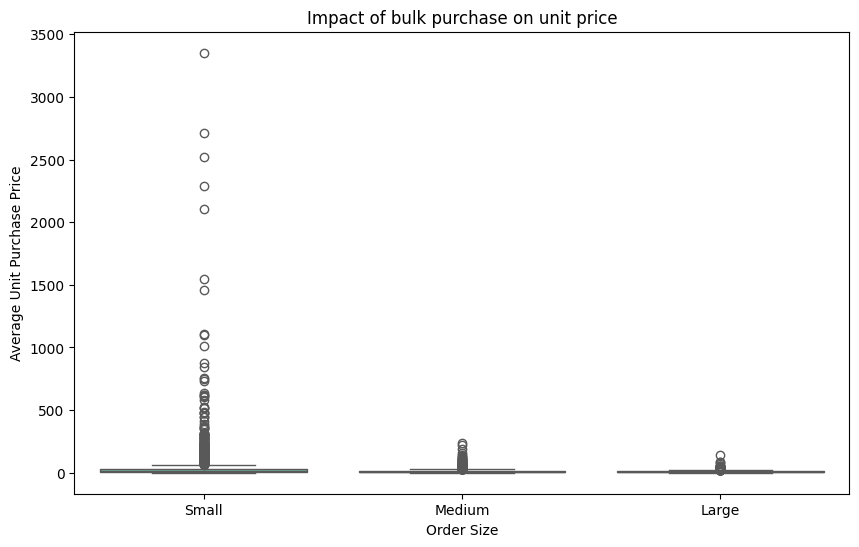

In [132]:
#====== Analyze using box plot to idea of variation
plt.figure(figsize= (10,6))
sns.boxplot(data = reqd_dataset, x = "OrderSize", y= "UnitPurchasePrice", palette="Set2")
plt.title("Impact of bulk purchase on unit price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

#### **Key Takes:**
* Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.52 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large orders is substantial (~72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.

#### **========6.Vendors having low inventory turnover, indicating excess stock and slow-moving products. "========**

In [134]:
#== What we have 
reqd_dataset

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,128606.0,613021.40,4631548.94,236299.10,68601.68,820297.34,17.71,0.89,1.215230,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,142035.0,512403.31,4291107.61,260975.54,144929.24,487066.39,11.35,0.87,1.128039,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,169835.0,420408.49,4131626.15,312057.64,123780.22,713322.47,17.26,0.91,1.208677,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,169057.0,382729.79,3817831.43,310629.46,257032.07,556633.49,14.58,0.84,1.170684,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,121484.0,496084.85,3792631.16,223213.81,257032.07,769425.15,20.29,0.88,1.254506,21.89,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,50.0,1.99,2.0,2.84,14.0,5.97,27.86,0.73,257032.07,25.02,89.81,7.00,9.809859,1.42,Small
7807,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2.0,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.45,2.50,6.041667,1.32,Small
7808,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6.0,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.44,22.33,28.059829,0.39,Small
7809,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1.0,1.47,69.0,71.64,137.31,14.49,257032.07,135.84,98.93,69.00,93.408163,1.47,Small


In [140]:
#======== We don't need to work on all vendors but those with low inventory turnover indicating they have excess stock and not able to move that i.e., StockTurnover < 1 are meaningful for us
low_stockturnover_vendors =  reqd_dataset[reqd_dataset["StockTurnover"] < 1].groupby("VendorName")[["StockTurnover"]].mean()
low_stockturnover_vendors = low_stockturnover_vendors.sort_values("StockTurnover", ascending= True).reset_index()
low_stockturnover_vendors = low_stockturnover_vendors.head(10) # top 10 vendors with lowest stock turnover
low_stockturnover_vendors

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.5000
1,FULCHINO VINEYARD INC,0.6900
2,SOUTHERN GLAZERS W&S OF NE,0.6900
3,Dunn Wine Brokers,0.7000
4,HIGHLAND WINE MERCHANTS LLC,0.7100
5,HAUNTING WHISPER VYDS,0.7200
6,KLIN SPIRITS LLC,0.7350
7,DJINN SPIRITS LLC,0.7425
8,THE IMPORTED GRAPE LLC,0.7480
9,INCREDIBREW INC,0.7575


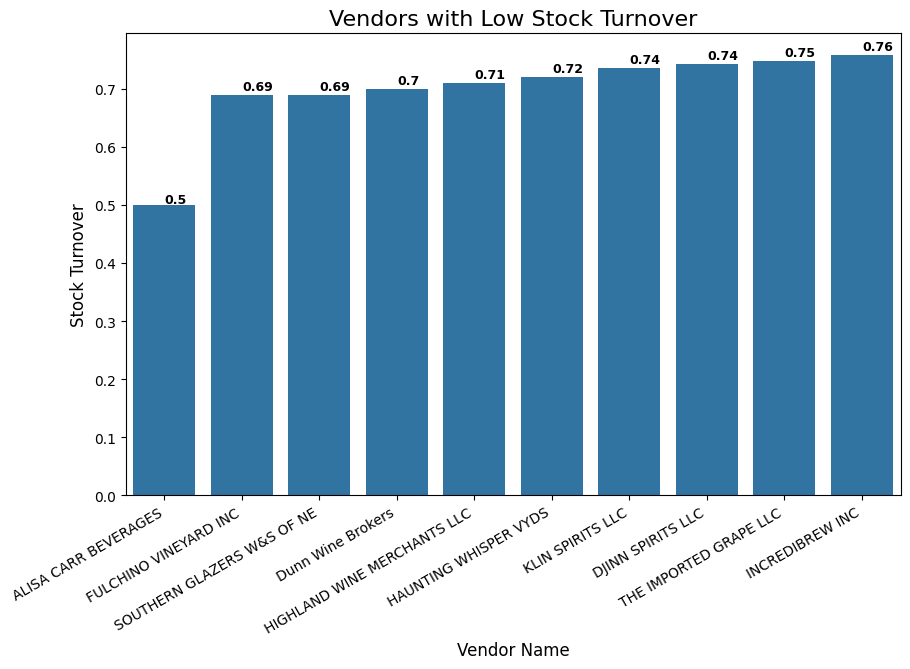

In [168]:
plt.figure(figsize=(10,6))
sns.barplot(data = low_stockturnover_vendors, x = "VendorName", y= "StockTurnover")

# For data labels
for i, value in enumerate(low_stockturnover_vendors["StockTurnover"].values):  # i : index(position), value: actual sales 
    plt.text(i, value*1.02, round(value,2), va='center', ha='left', fontsize=9, fontweight= "bold")
#============= OR ======================
# ======= |> Add data labels on top of each bar
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2,
#             height + 0.05,                # Slightly above the bar
#             f'{height:.2f}',              # Format to 2 decimals
#             ha='center', va='bottom', fontsize=9)

# Add title and axis labels with font sizes
plt.title("Vendors with Low Stock Turnover", fontsize=16)
plt.xlabel("Vendor Name", fontsize=12)
plt.ylabel("Stock Turnover", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha='right', fontsize=10)

plt.show()

#### **========== 7. Capital that is locked in unsold inventory per vendor & Vendors contributing most to it===========**

In [180]:
#====== new column "UnsoldInventoryValue" : To get how much we have purchased and remained unsold.
reqd_dataset["UnsoldInventoryValue"] = (reqd_dataset["TotalPurchaseQuantity"] - reqd_dataset["TotalSalesQuantity"] ) * reqd_dataset["PurchasePrice"]   # Amount we spent to purchase but not sold yet
reqd_dataset

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,...,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice,OrderSize,UnsoldInventoryValue
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,145080.0,3811251.60,128606.0,...,4631548.94,236299.10,68601.68,820297.34,17.71,0.89,1.215230,26.27,Large,432771.98
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,164038.0,3804041.22,142035.0,...,4291107.61,260975.54,144929.24,487066.39,11.35,0.87,1.128039,23.19,Large,510249.57
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,187407.0,3418303.68,169835.0,...,4131626.15,312057.64,123780.22,713322.47,17.26,0.91,1.208677,18.24,Large,320513.28
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,201682.0,3261197.94,169057.0,...,3817831.43,310629.46,257032.07,556633.49,14.58,0.84,1.170684,16.17,Large,527546.25
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,138109.0,3023206.01,121484.0,...,3792631.16,223213.81,257032.07,769425.15,20.29,0.88,1.254506,21.89,Large,363921.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,50.0,1.99,2.0,2.84,14.0,...,27.86,0.73,257032.07,25.02,89.81,7.00,9.809859,1.42,Small,-17.04
7807,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,750.0,4.99,2.0,2.64,5.0,...,15.95,0.55,27100.41,13.31,83.45,2.50,6.041667,1.32,Small,-3.96
7808,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,50.0,0.49,6.0,2.34,134.0,...,65.66,7.04,50293.62,63.32,96.44,22.33,28.059829,0.39,Small,-49.92
7809,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,200.0,1.99,1.0,1.47,69.0,...,137.31,14.49,257032.07,135.84,98.93,69.00,93.408163,1.47,Small,-99.96


In [181]:
#========= Overall unsold amount/capital
print("Total Unsold Capital: ", format_dollars(reqd_dataset["UnsoldInventoryValue"].sum()) )   # format_dollars(sales) function above to change format of amount like 10000002 = "1.2M"

Total Unsold Capital:  35.23M


In [188]:
#=========== Unsold capital locked Per Vendor
unsold_inv_per_vendor = reqd_dataset.groupby("VendorName")[["UnsoldInventoryValue"]].sum().reset_index()


#=============== Top 10 Vendors who have maximum capital locked in unsold inventory
unsold_inv_per_vendor = unsold_inv_per_vendor.sort_values(by = "UnsoldInventoryValue", ascending= False)
unsold_inv_per_vendor["UnsoldInventoryValue"] = unsold_inv_per_vendor["UnsoldInventoryValue"].apply(format_dollars)  # === applying above format_dollars() -> formating floating Amount into string Millions, Thousands etc .
unsold_inv_per_vendor = unsold_inv_per_vendor.head(10)  # Need top 10


unsold_inv_per_vendor

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,6.21M
68,PERNOD RICARD USA,3.11M
46,JIM BEAM BRANDS COMPANY,2.90M
57,MARTIGNETTI COMPANIES,2.74M
20,CONSTELLATION BRANDS INC,1.75M
61,MOET HENNESSY USA INC,1.59M
30,E & J GALLO WINERY,1.58M
11,BROWN-FORMAN CORP,1.57M
6,BACARDI USA INC,1.56M
79,SAZERAC CO INC,1.28M


# **========== 8. HYPOTHESIS TESTING ===========**
* **Use T-tests { not Z(n> 30, pop var known) or Chi-square(for categorical data) } because:**
  * we’re comparing means (average performance metrics like sales/ratings).
  * Sample sizes might be small (common for vendor data).
  * Population variance is unknown.


---
### **Part 1** Confidence Interval:-  Using Confidence Interval to Compare top performing and low performing vendors.
* Find 95% confidence intervals for both top-performing & low-performing vendors & compare performance.

In [190]:
#======= Setting threshold for top & low performing vendors
top_threshold = reqd_dataset["TotalSalesDollars"].quantile(0.75)  # gives 75th percentile value i.e., value below which 75 values lie
low_threshold = reqd_dataset["TotalSalesDollars"].quantile(0.25)   # Threshold -> low vendors those having value <= 25th smallest value

In [196]:
#======= Now top vendors based on above threshold -> We will check ProfitMargin of vendors wich high and low Sales
top_vendors =  reqd_dataset[reqd_dataset["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()       # Considering Profit Margin of top and low performing vendors
low_vendors =  reqd_dataset[reqd_dataset["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()   # dop if there is any empty entry

In [203]:
#=== just to check
top_vendors

0       17.71
1       11.35
2       17.26
3       14.58
4       20.29
        ...  
3283    79.21
3430    85.51
4412    92.95
4569    94.99
4685    94.04
Name: ProfitMargin, Length: 1953, dtype: float64

In [202]:
low_vendors

7774    99.34
7762    99.32
7810    99.17
7809    98.93
7743    98.66
        ...  
5913     0.14
6995     0.08
6193     0.05
7100     0.03
6033     0.02
Name: ProfitMargin, Length: 1953, dtype: float64

In [211]:
#============ Function that computes confidence interval -> Called later on below
def confidence_interval(data, confidence= 0.95):   # t - test where pop variance is unkonwn and we use sample variance
    n = len(data)   # no of elements
    mean_value = np.mean(data) 
    std_err = np.std(data, ddof = 1) /  np.sqrt(n)   # (np.std(data, ddof = 1) -> compute std dev of sample)  -> By default, np.std() uses delta deg of freed - ddof=0, which calculates the population standard deviation.
    #=== computing critical value of t-distribution  -> a cutoff point on a distribution (like Z, T, or Chi-square) that helps decide whether to reject the null hypothesis. (reject Ho if value > critical value
    t_critical = stats.t.ppf((1+confidence)/2 , df = n -1)  # stats.t.ppf(x, df) -> Give me the t-value such that the area to the left of it is X. (Here we have 2 tail test so at 95%, X = .95 + (.05/2) = 0.975 (1+.95 / 2)  : 0.5/2 added to X becz we have take accound its half as its half is included on left tail area
    margin_of_err = t_critical * std_err  # as we studied Confidence interval = mean +_ t(α/2)*std_err = mean +_ MOF
    # === finally return mean(center of dist), lower-bound, upper-bound
    return mean_value, mean_value - margin_of_err, mean_value + margin_of_err  
#==== at 95% conidence, this interval mean we are 95% confident the value e in this interval only (5% chances to make error - type I - reject H0 when it is true)

In [215]:
#============== Check and get values
top_mean, top_lower_bound, top_upper_bound =  confidence_interval(top_vendors)  # Confidence int for top_vendors
print(f"Top Vendors 95% CI : ({top_lower_bound:.2f},{top_upper_bound:.2f}), Mean: {top_mean:.2f}")

Top Vendors 95% CI : (22.50,23.56), Mean: 23.03


In [216]:
low_mean, low_lower_bound, low_upper_bound =  confidence_interval(low_vendors)
print(f"Low Vendors 95% CI : ({low_lower_bound:.2f},{low_upper_bound:.2f}), Mean: {low_mean:.2f}")

Low Vendors 95% CI : (41.11,43.50), Mean: 42.31


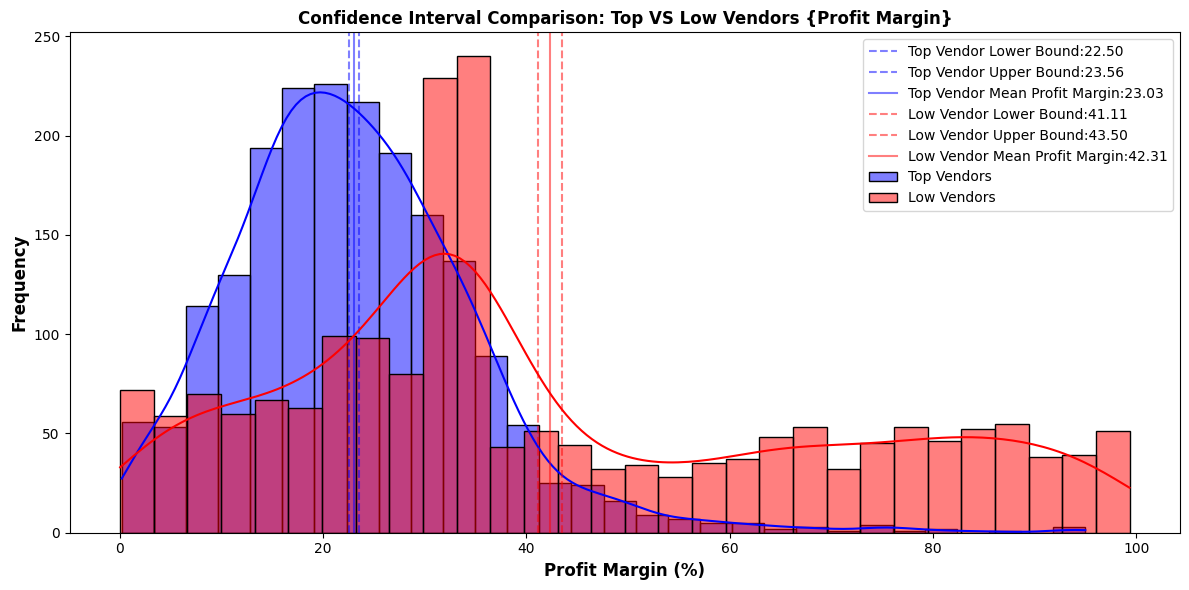

Top Vendors 95% CI : (22.50,23.56), Mean: 23.03
Low Vendors 95% CI : (41.11,43.50), Mean: 42.31


In [236]:
#============== Showing it graphically using histogram with kde=True (kernal density estimation: smoothing distri), vertical lines showing confidence interval
plt.figure(figsize=(12,6))

#================ For Top Vendors
sns.histplot(top_vendors, bins= 30, kde=True, color = "blue", alpha= 0.5, label = "Top Vendors")
# Confidence interval & mean with vertical lines
plt.axvline(top_lower_bound, color= "blue", alpha = 0.5, linestyle="--", label=f"Top Vendor Lower Bound:{top_lower_bound:.2f}")  # Lower bound
plt.axvline(top_upper_bound, color= "blue", alpha = 0.5, linestyle="--", label=f"Top Vendor Upper Bound:{top_upper_bound:.2f}")  # upper bound
plt.axvline(top_mean, color= "blue", alpha = 0.5, linestyle="-", label=f"Top Vendor Mean Profit Margin:{top_mean:.2f}")  #== Mean value - central value of distribution



#================ For Low performing Vendors
sns.histplot(low_vendors, bins= 30, kde=True, color = "red", alpha= 0.5, label = "Low Vendors")
# Confidence interval & mean with vertical lines
plt.axvline(low_lower_bound, color= "red", alpha = 0.5, linestyle="--", label=f"Low Vendor Lower Bound:{low_lower_bound:.2f}")  # Lower bound
plt.axvline(low_upper_bound, color= "red", alpha = 0.5, linestyle="--", label=f"Low Vendor Upper Bound:{low_upper_bound:.2f}")  # upper bound
plt.axvline(low_mean, color= "red", alpha = 0.5, linestyle="-", label=f"Low Vendor Mean Profit Margin:{low_mean:.2f}")  #== Mean value - central value of distribution







#======== Customize
plt.title("Confidence Interval Comparison: Top VS Low Vendors {Profit Margin}", fontsize= 12, fontweight = "bold")
plt.xlabel("Profit Margin (%)" , fontsize= 12, fontweight = "bold")
plt.ylabel("Frequency" , fontsize= 12, fontweight = "bold")
plt.legend() # Display all label added above
plt.tight_layout()
plt.show()



#============ For reference
print(f"Top Vendors 95% CI : ({top_lower_bound:.2f},{top_upper_bound:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI : ({low_lower_bound:.2f},{low_upper_bound:.2f}), Mean: {low_mean:.2f}")

### ======= Key takes:
* The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).

* This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs. (As you can see low performing vendors have Profit margin even after 80%(x axis red bars/kde line), while as Top performer's Profit margin starts vanishing from 60 onwards and completely vanishes after 80%)

  
**-- Recommendations:**
* For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies(As we saw above bundling lowers unit purchase price but increases sales).
* For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.



---
### **Part 2:** Actual Hypothesis Testing to check "Is there any difference in Profit Margin between top-performing and low-performing vendors" 

***Hypothesis:***
* Ho (Null Hypothesis) : There is **no significant** difference in mean profit margin of top-performing and low-performing vendors.
* H1 (Alternate Hypothesis) : The mean profit margin of top-performing and low-performing vendors is **Significantly different**.

-- REMARK: Use t-test -> Since we are comparing means of 2 pop and no variance is given

In [256]:
#============ Like above finding top performing and low performing vendors
top_threshold = reqd_dataset["TotalSalesDollars"].quantile(0.75)  
low_threshold = reqd_dataset["TotalSalesDollars"].quantile(0.25)  
#======= Now top vendors based on above threshold
top_vendors =  reqd_dataset[reqd_dataset["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()       # Considering Profit Margin of top and low performing vendors
low_vendors =  reqd_dataset[reqd_dataset["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()   # dop if there is any empty entry

#============ Since we are dealing at 95% confidence , so alpha = 0.05 (Significance level)
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False) # t test for independent variables (low and top vendors - both different)
#=== t_stat -> t-value -> t-critical  = mean1 - mean2 / standard_error

print(f"T-Statistics: {t_stat:.4f}, P-value: {p_value:.4f}")

#======== Check and print the result 
if p_value < 0.05:  # alpha = 0.05  
    print("Reject Ho: There is a significant difference in profit margins of top-performing and low-performing vendors.")
else:
    print("Fail to reject Ho: There is No significant difference in profit margins of top-performing and low-performing vendors.")
    

T-Statistics: -28.9622, P-value: 0.0000
Reject Ho: There is a significant difference in profit margins of top-performing and low-performing vendors.


### ============= Key insights:
* Top performing and low performing vendors actually perform differently confirming above analysis using confidence interval was significantly accurate.